# Implementacion de contrilador PID

Proporcional, Integral, Derivativo

- Video [Link](https://www.youtube.com/watch?v=fWQWX9-8_sA&t=2486s)

In [1]:
# Cart pole code
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
from matplotlib.patches import Rectangle


### Definicion de los parametros del pendulo

In [2]:
# define pendulum parameters
g = 9.8  # gravity (m/s^2)
L = 2  # Length (m)
m1 = 2  # Cart mass (kg)
m2 = 1  # Pendulum mass (kg)
b = 0.0  # Viscous friction coefficient

# Define Time Vector for Simulation
dt = 0.001  # Time Step
sim_time = 10  # Length of Simulation
t_vec = np.arange(0, sim_time, dt)

### Inicializacion del vector de estado

In [3]:
# Initialize State Vectors:
vec_size = len(t_vec)  # We use this value alot so lets store it
x_vec = np.zeros(vec_size)
dx_vec = np.zeros(vec_size)
theta_vec = np.zeros(vec_size)
dtheta_vec = np.zeros(vec_size)

# Pole End effector Location for Animation:
x_pole = np.zeros(vec_size)
y_pole = np.zeros(vec_size)

################################################
## Choose the starting position of the Cartpole
# Assign Intial Conditions:
x_vec[0] = 0   # Cart Position
dx_vec[0] = 0  # Cart Velocity
theta_vec[0] = 9.8*np.pi/10 # Pole Angle
dtheta_vec[0] = 0          # Pole Angular Velocity
################################################

### Posicion inicial del efector final (Barra)

In [4]:
# Initial Pole End effector Location:
y_offset = 0  # The Y Location of where the Cart and Pole are connected
x_pole[0] = x_vec[0] + L * np.sin(theta_vec[0])
y_pole[0] = y_offset - L * np.cos(theta_vec[0])

## Euler simulation (no run)

In [5]:
# Comment In / Out using the command (Ctrl + /)
# Euler Simulation: (Long Math)
# for i in range(1, vec_size):
#     x_vec[i] = x_vec[i - 1] + dx_vec[i - 1] * dt
#     theta_vec[i] = theta_vec[i - 1] + dtheta_vec[i - 1] * dt
#     dx_vec[i] = dx_vec[i - 1] + -(2 * L * m2 * np.sin(theta_vec[i - 1]) * dtheta_vec[i - 1] ** 2 + 4 * b * dx_vec[i - 1] - 3 * g * m2 * np.cos(theta_vec[i - 1]) * np.sin(theta_vec[i - 1])) / (4 * m1 + 4 * m2 - 3 * m2 * np.cos(theta_vec[i - 1]) ** 2) * dt
#     dtheta_vec[i] = dtheta_vec[i - 1] + -(-3 * L * m2 * np.cos(theta_vec[i - 1]) * np.sin(theta_vec[i - 1]) * dtheta_vec[i - 1] ** 2 + 6 * g * m1 * np.sin(theta_vec[i - 1]) + 6 * g * m2 * np.sin(theta_vec[i - 1]) - 6 * b * dx_vec[i - 1] * np.cos(theta_vec[i - 1])) / (L * (4 * m1 + 4 * m2 - 3 * m2 * np.cos(theta_vec[i - 1]) ** 2)) * dt
#     # Extra States for Animation:
#     x_pole[i] = x_vec[i] + L * np.sin(theta_vec[i])
#     y_pole[i] = y_offset - L * np.cos(theta_vec[i])

# Euler Simulation: Using Matrix Form (A * x = B)
# Initialize A and B:
A = np.array([[m1 + m2, 0], [0, 1 / 3 * m2 * L ** 2]])
B = np.array([0, 0])

### Loop de simulacion

In [23]:
# Initial error integral is zero
error_int = 0

# Simulation Loop
for i in range(1, vec_size):


    ################################################
    ## Define your Control Input (Force on the Cart)
    # Control input (force)
    #
    # Reference previous measured values 
    # x_vec[i-1]
    # theta_vec[i-1]
    # dx_vec[i-1]
    # dtheta_vec[i-1]
    thetades = np.pi # Desired cart position
    Kp = 50 # Proportional Gain
    Ki = 1 # Integral Gain
    Kd = 10 # Derivative Gain
    e = thetades - theta_vec[i-1]
    de_dt = -dtheta_vec[i-1]
    error_int = error_int + e*dt
    
    u = Kp*e + Ki*error_int + Kd*de_dt # Force

    ################################################

    # Simulate the Cart
    # Only the off diagonal needs to be Updated:
    A[0, 1] = 1 / 2 * m2 * L * np.cos(theta_vec[i-1])
    A[1, 0] = 1 / 2 * m2 * L * np.cos(theta_vec[i-1])
    # b must be updated every iteration:
    B[0] = -1 / 2 * m2 * L * (dtheta_vec[i-1] ** 2) * np.sin(theta_vec[i-1]) - b * dx_vec[i-1] + u/m1
    B[1] = -m2 * g * L / 2 * np.sin(theta_vec[i-1])
    [ddx, ddtheta] = np.linalg.solve(A, B)
    # Use ddx and ddtheta to solve:
    x_vec[i] = x_vec[i - 1] + dx_vec[i - 1] * dt
    theta_vec[i] = theta_vec[i - 1] + dtheta_vec[i - 1] * dt
    dx_vec[i] = dx_vec[i - 1] + ddx * dt
    dtheta_vec[i] = dtheta_vec[i - 1] + ddtheta * dt
    # Extra States for Animation:
    x_pole[i] = x_vec[i] + L * np.sin(theta_vec[i])
    y_pole[i] = y_offset - L * np.cos(theta_vec[i])


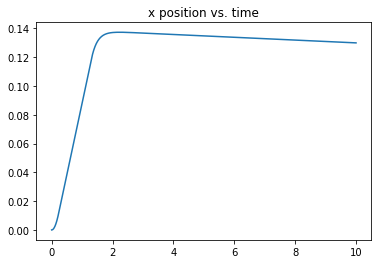

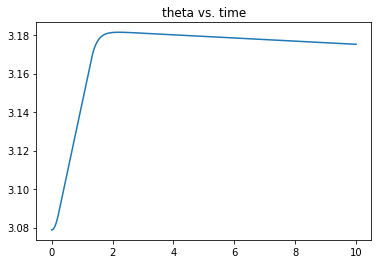

In [24]:
plt.plot(t_vec, x_vec)
plt.title("x position vs. time")
plt.show()
plt.plot(t_vec, theta_vec)
plt.title("theta vs. time")
plt.show()

### Creacion de la simulacion

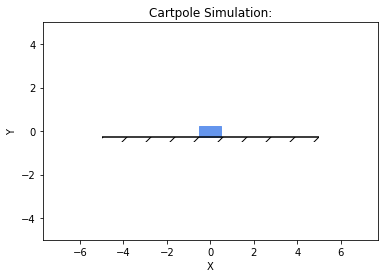

In [12]:
# Create Animation:
# Setup Figure:
fig, ax = plt.subplots()
p, = ax.plot([], [], color='royalblue')
min_lim = -5
max_lim = 5
ax.axis('equal')
ax.set_xlim([min_lim, max_lim])
ax.set_ylim([min_lim, max_lim])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Cartpole Simulation:')
title = "simulation"

# Setup Animation Writer:
FPS = 20
sample_rate = int(1 / (dt * FPS))  # Real Time Playback
dpi = 300
writerObj = FFMpegWriter(fps=FPS)

# Initialize Patch: (Cart)
width = 1  # Width of Cart
height = width / 2  # Height of Cart
xy_cart = (x_vec[0] - width / 2, y_offset - height / 2)  # Bottom Left Corner of Cart
r = Rectangle(xy_cart, width, height, color='cornflowerblue')  # Rectangle Patch
ax.add_patch(r)  # Add Patch to Plot

# Draw the Ground:
ground = ax.hlines(-height / 2, min_lim, max_lim, colors='black')
height_hatch = 0.25
width_hatch = max_lim - min_lim
xy_hatch = (min_lim, y_offset - height / 2 - height_hatch)
ground_hatch = Rectangle(xy_hatch, width_hatch, height_hatch, facecolor='None', linestyle='None', hatch='/')
ax.add_patch(ground_hatch)


## Animacion

In [18]:

# Animate:
with writerObj.saving(fig, 'simulation.mp4', dpi=dpi):
    for i in range(0, vec_size, sample_rate):
        # Update Pendulum Arm:
        x_pole_arm = [x_vec[i], x_pole[i]]
        y_pole_arm = [y_offset, y_pole[i]]
        p.set_data(x_pole_arm, y_pole_arm)
        # Update Cart Patch:
        r.set(xy=(x_vec[i] - width / 2, y_offset - height / 2))
        # Update Drawing:
        fig.canvas.draw()
        # Save Frame:
        writerObj.grab_frame()

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado